# Movie Recommendation System - Capstone Project

The goal of this project is to design and build 3 types of movie recommendation system.

1. Understanding the Data
2. Exploratory Data Analysis (EDA)
   * 2.1 Checking for missng Data
   * 2.2 Data Description
   * 2.3 WordClouds for Genres and Titles
   * 2.4 Distribution of Ratings
   * 2.5 Number of Ratings per Movie
   * 2.6 Average Rating and Total Movies at Genre Level
   * 2.7 Distribution of Rated Movies by Genre
3. Movie Recommendation System 
    * 3.1 Popularity-based Recommender at Genre Level
    * 3.2 Content-Based Recommender based on similar movie genres
    * 3.3 Collaborative Filtering Approaches
4. Conclusion and Future Improvements 

### 1. Understanding the Data
We have two datasets:

* movies.csv contains:
    * movieId: Unique identifier for a movie
    * title: Name of the movie
    * genres: Pipe-separated list of genres for the movie

* ratings.csv contains:
    * userId: Unique identifier for a user
    * movieId: Unique identifier for a movie
    * rating: The rating given by the user
    * timestamp: Time when the rating was given

### 2. Exploratory Data Analysis (EDA)
Let's first analyze the data to get insights.

Loading and Exploring the Dataset
We'll load both datasets and check for missing values and basic statistics.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [4]:
 ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


### 2.1 Checking for Missing Data
We will explicitly check for missing values in both movies and ratings datasets.

In [5]:
# Check for missing values
print("Missing values in movies dataset:")
print(movies.isnull().sum())

print("\nMissing values in ratings dataset:")
print(ratings.isnull().sum())


Missing values in movies dataset:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings dataset:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


### 2.2 Data Description
Summary of the dataset to highlight its key characteristics.

In [6]:

# Merge with movie titles
df=pd.merge(ratings,movies, how='left',on='movieId')
# print(df.head())

# Count unique users and movies
unique_users = df['userId'].nunique()
unique_movies = df['movieId'].nunique()

# Dataset Summary
num_ratings = ratings.shape[0]  # Total ratings
num_movies = movies.shape[0]  # Total movies
num_users = ratings['userId'].nunique()  # Unique users
avg_rating = ratings['rating'].mean()  # Average rating
min_rating = ratings['rating'].min()  # Minimum rating
max_rating = ratings['rating'].max()  # Maximum rating

# Extract genres, split and count unique ones
unique_genres = set()
df['genres'].str.split('|').dropna().apply(unique_genres.update)
unique_genres_count = len(unique_genres)

print(f"Total Ratings: {num_ratings}")
print(f"Total Movies: {num_movies}")
print(f"Total Unique Users: {num_users}")
print(f"Average Rating: {avg_rating:.2f}")
print(f"Rating Range: {min_rating} to {max_rating}")
print(f"Total Unique Genres: {unique_genres_count}")
print(f"Genres ==> {unique_genres}")


Total Ratings: 105339
Total Movies: 10329
Total Unique Users: 668
Average Rating: 3.52
Rating Range: 0.5 to 5.0
Total Unique Genres: 20
Genres ==> {'Horror', 'War', 'Romance', 'Action', 'Fantasy', 'Animation', 'Mystery', 'Children', 'Thriller', 'Documentary', 'Adventure', 'Comedy', 'Film-Noir', 'Musical', '(no genres listed)', 'IMAX', 'Drama', 'Sci-Fi', 'Crime', 'Western'}


### Data Description 
* The data consists of 105339 ratings applied to over 10329 movies. 
* The average rating is 3.5 and minimum and maximum rating is 0.5 and 5 respectively. 
* There are 668 users who have given their ratings for 10329 movies.
* There are 20 Genres of Films. 

### 2.3 WordClouds for Genres and Titles
To visualize the most common movie genres and titles, we use WordCloud.

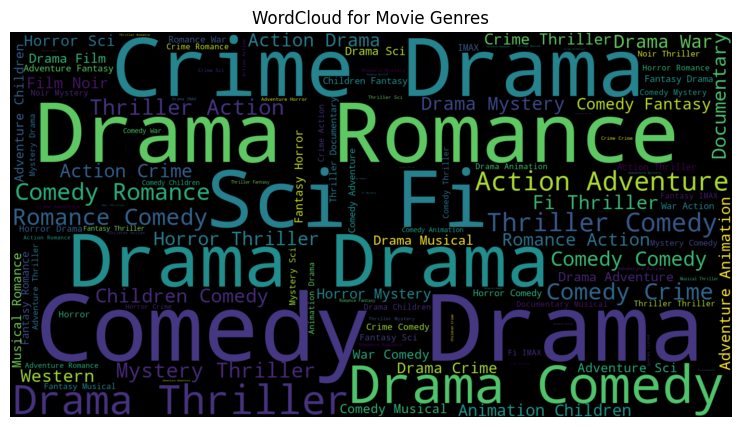

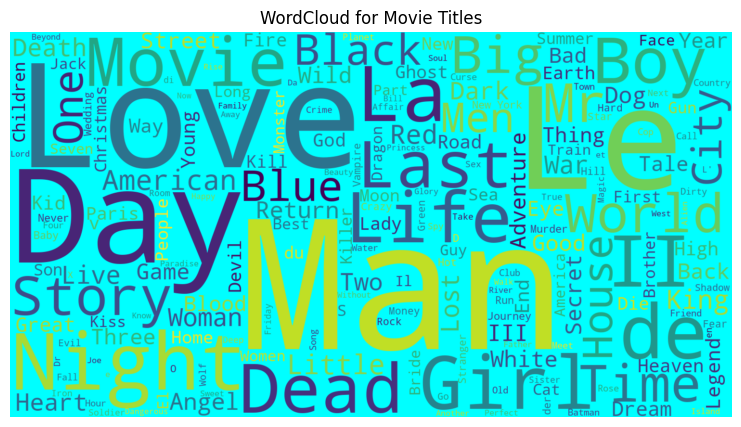

In [27]:
from wordcloud import WordCloud

# Extract unique genres
genres_list = []
for genre in movies['genres']:
    genres_list.extend(genre.split('|'))

genres_text = ' '.join(genres_list)

# Generate WordCloud for Genres
wordcloud_genre = WordCloud(width=1500, height=800, background_color='black', min_font_size=2).generate(genres_text)

# Generate WordCloud for Movie Titles
movie_titles_text = ' '.join(movies['title'])
wordcloud_title = WordCloud(width=1500, height=800, background_color='cyan', min_font_size=2).generate(movie_titles_text)

# Plot the WordClouds
plt.figure(figsize=(12, 5))
plt.title("WordCloud for Movie Genres")
plt.imshow(wordcloud_genre, interpolation='bilinear')
plt.axis("off")

plt.figure(figsize=(12, 5))
plt.title("WordCloud for Movie Titles")
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis("off")

plt.show()


### 2.4 Distribution of Ratings

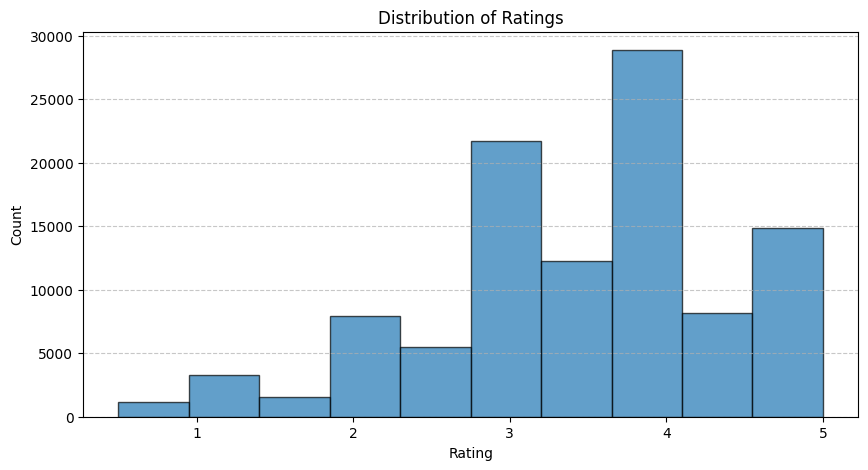

In [8]:
# Distribution of Ratings
plt.figure(figsize=(10, 5))
plt.hist(ratings['rating'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2.5 Number of Ratings per Movie

movieId
1         232
2          92
3          58
4          11
5          62
         ... 
146684      1
146878      1
148238      1
148626      3
149532      1
Length: 10325, dtype: int64


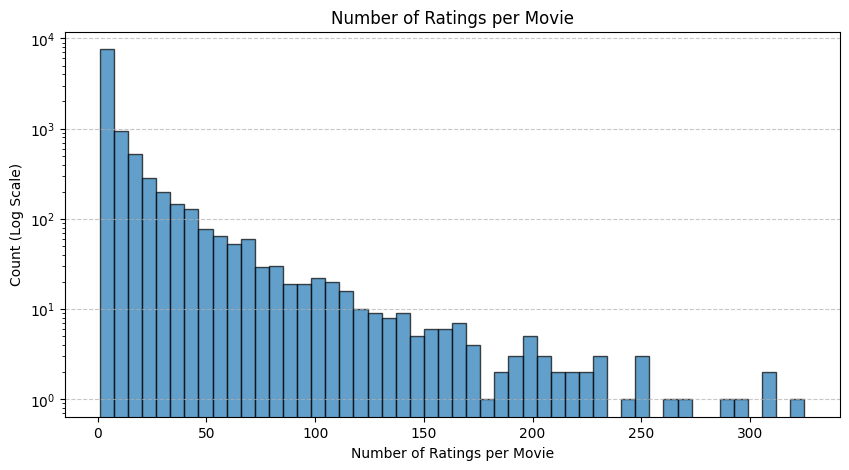

In [9]:
# Number of Ratings per Movie
ratings_per_movie = ratings.groupby('movieId').size()
print(ratings_per_movie)

plt.figure(figsize=(10, 5))
plt.hist(ratings_per_movie, bins=50, edgecolor='black', alpha=0.7, log=True)
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Count (Log Scale)')
plt.title('Number of Ratings per Movie')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:

# Calculate average rating and total movies at genre level
genre_ratings = []
for genre in unique_genres:
    genre_df = df[df['genres'].str.contains(genre, na=False)]
    avg_rating = genre_df['rating'].mean()
    total_movies = genre_df['movieId'].nunique()
    print(f"Searching for ratings with genre: {genre}  ==> {len(genre_df)} ratings, total unique movies: {total_movies} and avg-rating: {avg_rating}.")
    genre_ratings.append([genre, avg_rating, total_movies])

genre_ratings_df = pd.DataFrame(genre_ratings, columns=['Genre', 'Average Rating', 'Total Movies'])

# Display results

print("\nGenre Ratings: \n", genre_ratings_df)

Searching for ratings with genre: Horror  ==> 7983 ratings, total unique movies: 1001 and avg-rating: 3.281097331830139.
Searching for ratings with genre: War  ==> 5828 ratings, total unique movies: 503 and avg-rating: 3.7832017844886754.
Searching for ratings with genre: Romance  ==> 19094 ratings, total unique movies: 1788 and avg-rating: 3.544254739708809.
Searching for ratings with genre: Action  ==> 31205 ratings, total unique movies: 1737 and avg-rating: 3.4514500881269026.
Searching for ratings with genre: Fantasy  ==> 10889 ratings, total unique movies: 670 and avg-rating: 3.5004591789879695.
Searching for ratings with genre: Animation  ==> 5966 ratings, total unique movies: 400 and avg-rating: 3.6353503184713376.
Searching for ratings with genre: Mystery  ==> 8320 ratings, total unique movies: 675 and avg-rating: 3.652043269230769.
Searching for ratings with genre: Children  ==> 8098 ratings, total unique movies: 540 and avg-rating: 3.4394294887626575.
Searching for ratings wi

### 2.6 Average Rating and Total Movies at Genre Level

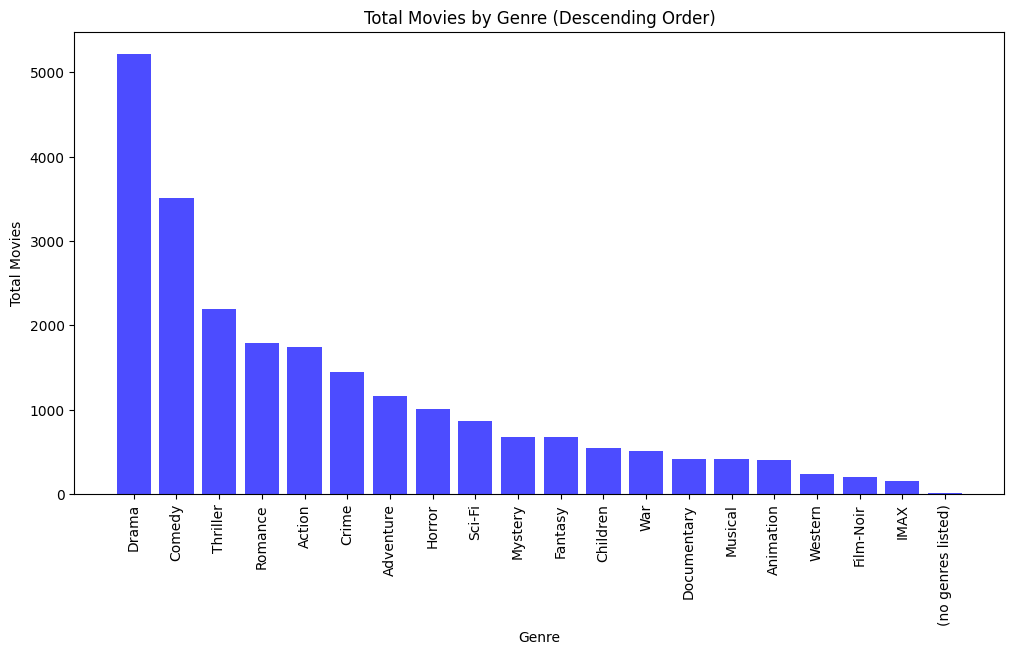

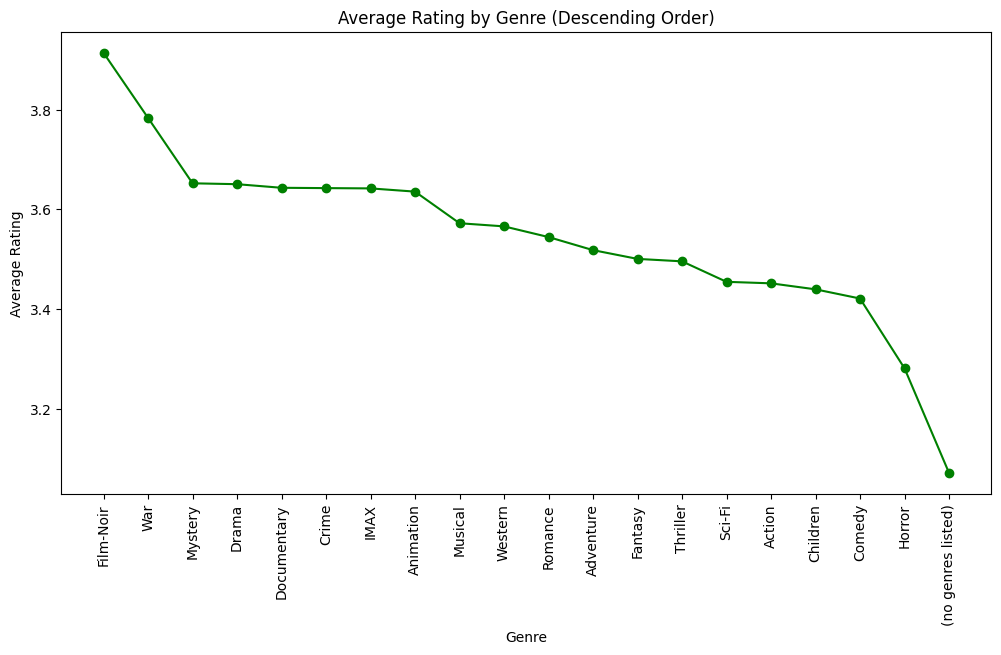

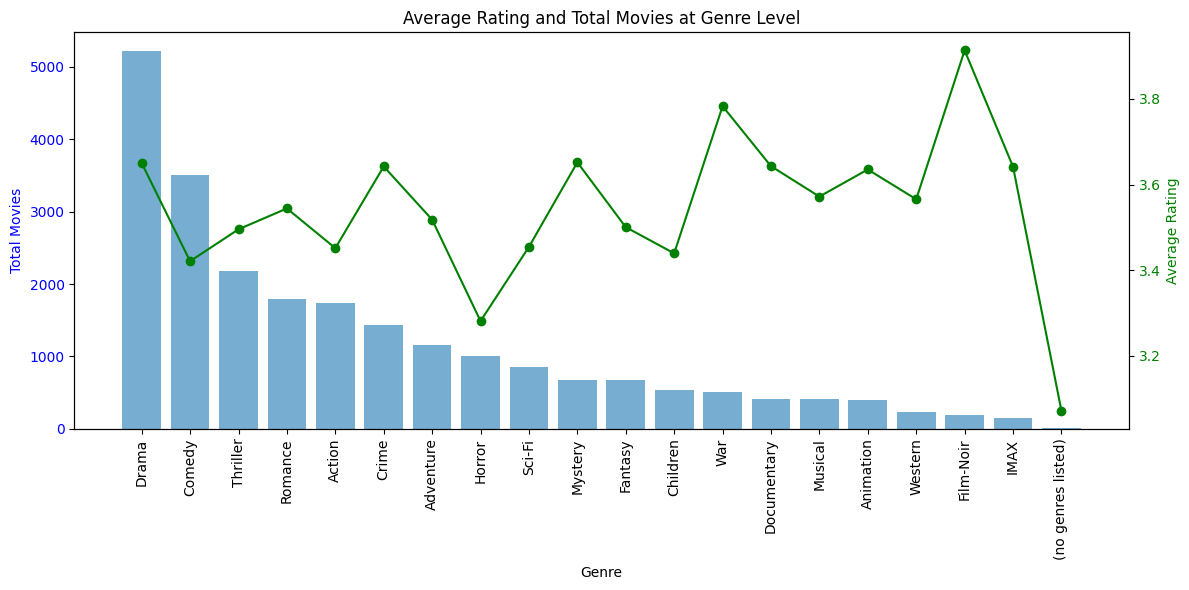

In [11]:
# Plot Average Rating and Total Movies at Genre Level


# Sort by Total Movies (Descending)
genre_ratings_total_sorted = genre_ratings_df.sort_values(by="Total Movies", ascending=False)

# Sort by Average Rating (Descending)
genre_ratings_avg_sorted = genre_ratings_df.sort_values(by="Average Rating", ascending=False)

# Create figure for Total Movies
plt.figure(figsize=(12, 6))
plt.bar(genre_ratings_total_sorted['Genre'], genre_ratings_total_sorted['Total Movies'], color="blue", alpha=0.7)
plt.xlabel("Genre")
plt.ylabel("Total Movies")
plt.title("Total Movies by Genre (Descending Order)")
plt.xticks(rotation=90)
plt.show()

# Create figure for Average Rating
plt.figure(figsize=(12, 6))
#plt.plot(genre_ratings_avg_sorted['Genre'], genre_ratings_avg_sorted['Average Rating'], color="green", alpha=0.7)
plt.plot(genre_ratings_avg_sorted['Genre'], genre_ratings_avg_sorted['Average Rating'], color="green", marker="o", label="Average Rating")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating by Genre (Descending Order)")
plt.xticks(rotation=90)
plt.show()



# Sort genre_ratings_df by 'Total Movies' in descending order
genre_ratings_df = genre_ratings_df.sort_values(by="Total Movies", ascending=False)

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for total movies
ax1.bar(genre_ratings_df['Genre'], genre_ratings_df['Total Movies'], alpha=0.6, label="Total Movies")
ax1.set_xlabel("Genre")
ax1.set_ylabel("Total Movies", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
plt.xticks(rotation=90)

# Create a second y-axis for average ratings
ax2 = ax1.twinx()
ax2.plot(genre_ratings_df['Genre'], genre_ratings_df['Average Rating'], color="green", marker="o", label="Average Rating")
ax2.set_ylabel("Average Rating", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Title and legend
plt.title("Average Rating and Total Movies at Genre Level")
fig.tight_layout()
plt.show()


### 3. Movie Recommendation System 

### 3.1 Popularity-Based Recommendation System at Genre Level
In this approach, movies are ranked based on their average rating and total number of reviews.

Finding the Top 5 Highest Rated Movies
* Filters movies by the given genre
* Ensures each movie meets the minimum number of reviews (t)
* Sorts by average rating in descending order
* Returns top (N) most popular movies in the genre

                                                 title  Average_Rating  \
57                   Ace Ventura: Pet Detective (1994)        2.849711   
102                                     Aladdin (1992)        3.602094   
130  Amelie (Fabuleux destin d'Amélie Poulain, Le) ...        4.075630   
137                                American Pie (1999)        3.266355   
228  Austin Powers: International Man of Mystery (1...        3.415842   

     Num_Reviews  
57           173  
102          191  
130          119  
137          107  
228          101  
Top Popular Movies in Genre: Comedy
                                        title  Average_Rating  Num_Reviews
2093  Monty Python and the Holy Grail (1975)        4.301948          154
995                             Fargo (1996)        4.271144          201
2498              Princess Bride, The (1987)        4.163743          171
2523                     Pulp Fiction (1994)        4.160000          325
1069                     Forrest G

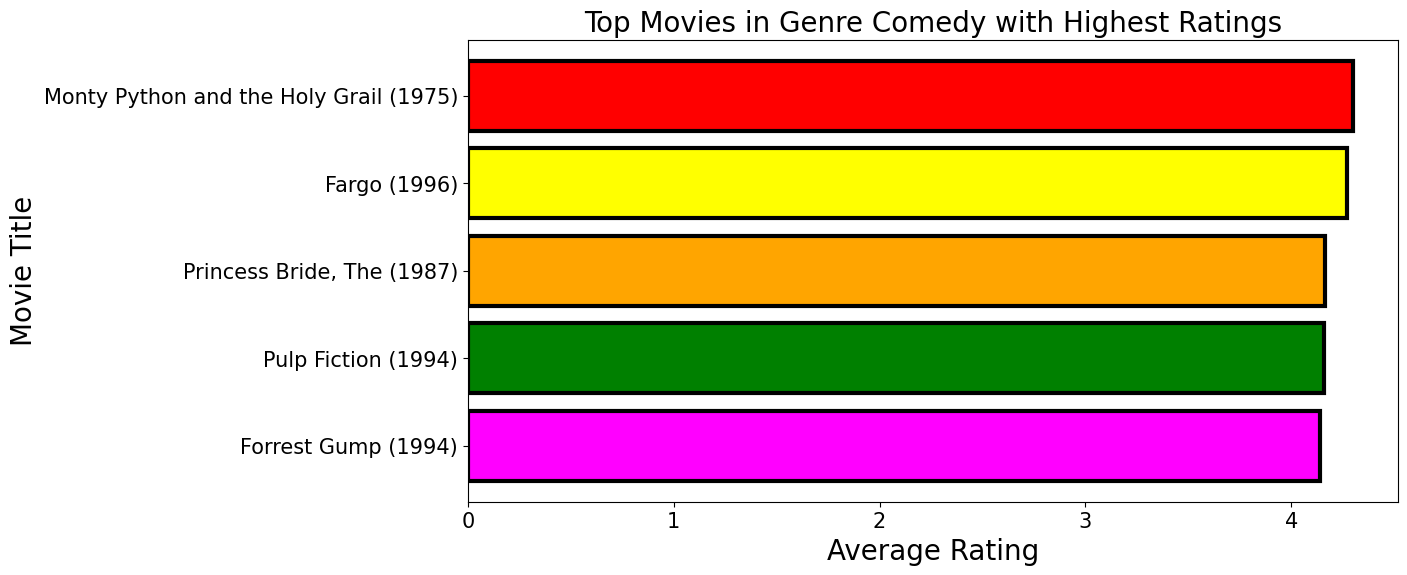

In [12]:
def popularity_based_recommender(df, genre, min_reviews=100, top_n=5):
    """
    Recommends top N movies based on popularity (highest average rating) within a given genre.
    
    Parameters:
    df (DataFrame): Merged DataFrame of movies and ratings
    genre (str): The genre to filter by
    min_reviews (int): Minimum number of reviews required for a movie
    top_n (int): Number of top movies to return
    
    Returns:
    DataFrame: Top N movies sorted by rating (descending)
    """
    # Filter movies by the selected genre
    genre_movies = df[df['genres'].str.contains(genre, case=False, na=False)]

    # Group by movie title and calculate the average rating & number of reviews
    movie_stats = genre_movies.groupby('title').agg(
        Average_Rating=('rating', 'mean'),
        Num_Reviews=('rating', 'count')
    ).reset_index()
    #print(movie_stats.head())
    # Filter movies that meet the minimum review threshold
    movie_stats = movie_stats[movie_stats['Num_Reviews'] >= min_reviews]
    print(movie_stats.head())
    # Sort movies by Average Rating in descending order
    top_movies = movie_stats.sort_values(by="Average_Rating", ascending=False).head(top_n)

    return top_movies

# Example Usage
genre_input = "Comedy"  # User-inputted Genre
min_reviews_threshold = 100  # Minimum number of reviews required
num_recommendations = 5  # Number of recommendations to return

# Get top N movies in the given genre
top_movies = popularity_based_recommender(df, genre_input, min_reviews_threshold, num_recommendations)

# Display results
print(f"Top Popular Movies in Genre: {genre_input}\n", top_movies)

# Plot top-rated movies
plt.figure(figsize=(12, 6))
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.barh(top_movies.title, top_movies['Average_Rating'] ,linewidth=3,edgecolor='black' , color=colors)
plt.xlabel("Average Rating", fontsize=20)
plt.ylabel("Movie Title", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(f"Top Movies in Genre {genre_input} with Highest Ratings", fontsize=20)
plt.gca().invert_yaxis()  # Invert y-axis to show highest rating on top
plt.show()


### 3.2 Content-based recommender system 
#### Based on similar movie genres
In this approach, we recommend movies that are most similar to a given movie based on genre similarity.

#### 1 Feature Extraction using TF-IDF
* Converts movie genres into numerical vectors using TF-IDF (Term Frequency - Inverse Document Frequency).

#### 2 Computing Similarity Scores
* Uses Cosine Similarity to calculate how close movies are based on their genre representation.

#### 3 Finding Similar Movies
* Retrieves similarity scores for the input movie.
* Sorts movies in descending order of similarity.
* Returns the top N most similar movies (excluding the input movie itself).

#### Summary
* Analyzes movie genres to find similar movies.
* Does not require user ratings, making it suitable for new or less-rated movies.
* Relies only on genre similarity, without considering user preferences.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Feature Extraction: TF-IDF (Text Vectorization)
cv=TfidfVectorizer()
# Used to convert text data (genres) into numerical features.
tfidf_matrix=cv.fit_transform(movies['genres'])
#print(movies['genres'])
#print(tfidf_matrix)
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
#print(movie_user.head())

# Similarity Calculation: Cosine Similarity
# Cosine Similarity is used to measure how similar two movies are based on their genre vectors.
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
#print(cosine_sim)
# Output: A similarity matrix where each movie is compared with every other movie

# Indexing: Creating a Quick Lookup for Movie Titles
# We create a mapping of movie titles to their indices to make retrieval efficient
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
#print(); print("Indices: \n", indices)
#print(); print("Titles: \n", titles)

# Suppose a user wants to watch a movie similar to Toy Story (1995) then we can recommend the user by calculating the cosine similarity 
# between Toy Story and other movies. So we have to first find the cosine similarity betw

#  Recommendation Function
def recommend_movies(title, num_recommendations=5):
    # 1  Find the index of the input movie
    idx = indices[title]   

    # 2 Retrieve similarity scores for all movies
    sim_scores = list(enumerate(cosine_sim[idx]))  
    #print(sim_scores)

    # 3 Sort movies by similarity (descending order).
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  
    # Now, most similar movies will be at the top.
    #print(sim_scores)

    # 4 Select the top N similar movies (excluding the input movie itself).
    sim_scores = sim_scores[1: num_recommendations+1]   
    # We start from index 1 because the most similar movie is always itself.
    #print(sim_scores)

    # 5 Extract movie indices & return recommended titles.
    # The indices of the most similar movies are retrieved and mapped back to movie titles.
    movie_indices = [i[0] for i in sim_scores] 
    #print(movie_indices)
    return titles.iloc[movie_indices]  #  retrieves movie titles using integer index positions
    


In [14]:
# Example: Recommend movies similar to "Toy Story"
recommend_movies('Toy Story (1995)', 10)

#recommend_movies('Space Jam (1996)', 30)

1815                                          Antz (1998)
2496                                   Toy Story 2 (1999)
2967       Adventures of Rocky and Bullwinkle, The (2000)
3166                     Emperor's New Groove, The (2000)
3811                                Monsters, Inc. (2001)
6617    DuckTales: The Movie - Treasure of the Lost La...
6997                                     Wild, The (2006)
7382                               Shrek the Third (2007)
7987                       Tale of Despereaux, The (2008)
9215    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object

### Strengths & Limitations (Content-based recommender based on similar movie genres)
#### Strengths
* Uses movie content (genres) instead of relying on user behavior.
* No user data needed (unlike collaborative filtering).
* Can recommend movies even if they have few ratings.

#### Limitations
* Does not consider user preferences (only finds "similar" movies, not necessarily "liked" ones).
* Limited to genre-based similarity (doesn’t consider cast, director, or plot).
* Cannot handle new genres well (since it relies on existing genre patterns).

### 3.3 Collaborative Filtering-Based Recommender System
#### Based on Similar Users' Preferences
In this approach, we recommend movies based on the preferences of users with similar tastes. Unlike the content-based method, which only looks at genres, collaborative filtering leverages actual user ratings to identify patterns.

#### 1 Building a User-Movie Interaction Matrix
* Converts the ratings dataset into a matrix where rows represent users and columns represent movies.
* Each cell contains the rating given by a user to a movie.

#### 2 Finding Similar Users (User-Based Collaborative Filtering)
* Computes similarity between users using cosine similarity or Pearson correlation.
* Identifies K users most similar to the target user (u).

#### 3 Generating Movie Recommendations
* Analyzes the top K similar users’ preferences.
* Recommends movies highly rated by these similar users but not yet watched by the target user.

#### Summary
* Personalized recommendations based on user behavior.
* Does not require metadata (e.g., genres, actors, etc.).
* Effective for users with sufficient rating history but struggles with new users ("cold start problem").

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Build the User-Movie Interaction Matrix

# Create a User-Movie matrix (pivot table)
user_movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
#print(user_movie_matrix)

# Fill NaN values with 0 (indicating no rating given)
user_movie_matrix = user_movie_matrix.fillna(0)
#print(user_movie_matrix)

# Convert to sparse matrix for efficient computation
sparse_matrix = csr_matrix(user_movie_matrix)
#print(sparse_matrix)


In [16]:
# Compute User Similarity Matrix

# Compute cosine similarity between users
user_similarity = cosine_similarity(sparse_matrix)
#print(user_similarity)

# Convert similarity scores into a DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)
#print(user_similarity_df)

In [17]:
# Define the Recommendation Function

def collaborative_recommender(user_id, num_recommendations=5, k_similar_users=100):
    """
    Recommends top N movies for a user based on K similar users' preferences.

    Parameters:
    user_id (int): Target user ID for whom recommendations are made.
    num_recommendations (int): Number of movie recommendations to return.
    k_similar_users (int): Number of similar users to consider.

    Returns:
    DataFrame: Recommended movies with predicted ratings.
    """

    # Get the similarity scores for the target user
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:k_similar_users+1]  # Skip self (index 0)
    #print(similar_users)
    
    # Get movies rated by similar users
    similar_users_movies = user_movie_matrix.loc[similar_users.index]
    #print(similar_users_movies)
    #print("\nSum: ", similar_users.sum())
    #print(similar_users_movies)

    # Compute weighted average ratings (ignoring zero ratings)
    weighted_ratings = similar_users_movies.T.dot(similar_users) / similar_users.sum()
    #print("\nweighted_ratings: \n", weighted_ratings)

    # Filter out movies already rated by the target user
    user_rated_movies = user_movie_matrix.loc[user_id]
    #print("\n user_rated_movies \n", user_rated_movies)
    unwatched_movies = weighted_ratings[user_rated_movies == 0].sort_values(ascending=False)
    #print("\n unwatched_movies \n", unwatched_movies)

    # Return top N recommended movies
    return unwatched_movies.head(num_recommendations).reset_index().rename(columns={0: 'Predicted Rating'})



In [25]:
# Get Recommendations for a User

# Example usage
user_id = 1  # Target user
num_recommendations = 5  # Number of recommendations
k_similar_users = 100  # Threshold for similar users

# Get movie recommendations
recommended_movies = collaborative_recommender(user_id, num_recommendations, k_similar_users)

# Display recommendations
print("\nTop Collaborative Filtering Recommendations: \n", recommended_movies)




Top Collaborative Filtering Recommendations: 
                                        title  Predicted Rating
0  Indiana Jones and the Last Crusade (1989)          2.585230
1                           Toy Story (1995)          2.458336
2                             Memento (2000)          2.404927
3                            Die Hard (1988)          2.399464
4                              Aliens (1986)          2.352151


### 4 Conclusion and Future Improvements

#### Summary of What Has Been Done
 In this project, we have built a Movie Recommendation System using three different approaches, each catering to different user needs and use cases.

#### 3.1 Popularity-Based Recommendation System
* Recommended top-rated movies within a specific genre.
* Ranked movies based on average rating and review count.
* Strengths: Simple, fast, and effective for general recommendations.
* Weaknesses: Lacks personalization; only considers highly rated movies, not individual user preferences.

#### 3.2 Content-Based Filtering (Genre Similarity)
* Recommended movies based on genre similarity.
* Used TF-IDF Vectorization and Cosine Similarity to find similar movies.
* Strengths: Works well for suggesting movies with similar themes even for new users.
* Weaknesses: Limited to genre-based similarity; does not consider user preferences or viewing history.

#### 3.3 Collaborative Filtering (User-Based)
* Recommended movies based on similar users' preferences.
* Built a user-movie interaction matrix, computed cosine similarity, and used matrix multiplication to generate recommendations.
* Strengths: Highly personalized recommendations based on real user behavior.
* Weaknesses: Suffers from the cold start problem, meaning recommendations may not be accurate for new users with no rating history.

#### Challenges Encountered
* Sparse Data Problem: Many users rate only a small subset of movies, making it difficult to provide personalized recommendations.
* Cold Start Problem: New users and new movies lack sufficient data, making it difficult to recommend relevant content.
* Computational Complexity: Collaborative filtering with large datasets can be computationally expensive.
* Genre Limitations in Content-Based Filtering: Only uses genre similarity, which may not fully capture user preferences.

#### Future Improvements & Next Steps

#### 1.Hybrid Recommendation System
* Combine content-based filtering and collaborative filtering to improve recommendation accuracy.
* Example: Recommend movies based on both similar users and similar genres.

#### 2.Matrix Factorization (SVD for Collaborative Filtering)
* Implement Singular Value Decomposition (SVD) to handle sparse user-movie matrices.
* This approach will improve recommendations by capturing latent user preferences.

#### 3.Incorporating More Features
* Use additional metadata such as cast, director, plot summaries, and movie reviews to enhance recommendations.
* Apply deep learning techniques (e.g., embeddings, neural networks) for more accurate results.

#### 4.Handling the Cold Start Problem
* Implement a hybrid approach that suggests popular movies for new users until enough data is collected.
* Ask new users for initial preferences (e.g., selecting favorite genres or movies) to provide better initial recommendations.

#### 5. Building a Web-Based Interface
* Develop an interactive UI using Streamlit, Flask, or Django.
* Allow users to input preferences and receive recommendations instantly.
* Enhance user experience by integrating user feedback into the system for continuous improvement.

#### Final Thoughts
This project successfully implemented three major recommendation techniques, providing valuable insights into their strengths and limitations. 
While these approaches perform well individually, combining them into a hybrid model and incorporating advanced techniques such as deep learning, embeddings, and improved collaborative filtering methods will further enhance recommendation accuracy and user experience.

#### Next Steps: 
Implement a hybrid recommender system, optimize performance, and develop a user-friendly web-based application to deploy the system for real-world usage.

